In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [16]:
# Load data into a pandas DataFrame
df = pd.read_csv('customer_booking.csv',encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [17]:
df.shape

(50000, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [19]:
# Drop unnecessary columns
df.drop(['flight_duration'], axis=1, inplace=True)

# Convert categorical variables to numerical representations using one-hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# Convert 'flight_hour' column to integer
df['flight_hour'] = df['flight_hour'].astype(int)

In [20]:
# Split data into features (X) and target (y)
X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

In [21]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [22]:
# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(kfold.split(X), start=1):
    print(f"Fold {i}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("---------")

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)
y_pred

Fold 1:
Accuracy: 0.8543
Precision: 0.5341246290801187
Recall: 0.12162162162162163
F1 Score: 0.19812878370941114
---------
Fold 2:
Accuracy: 0.8498
Precision: 0.4849315068493151
Recall: 0.11871227364185111
F1 Score: 0.19073275862068964
---------
Fold 3:
Accuracy: 0.8462
Precision: 0.5206611570247934
Recall: 0.12169993560849968
F1 Score: 0.19728601252609604
---------
Fold 4:
Accuracy: 0.8518
Precision: 0.4987012987012987
Recall: 0.12964213369345037
F1 Score: 0.2057877813504823
---------
Fold 5:
Accuracy: 0.8546
Precision: 0.5272206303724928
Recall: 0.12491513917175831
F1 Score: 0.20197585071350163
---------


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8546
Precision: 0.5272206303724928
Recall: 0.12491513917175831
F1 Score: 0.20197585071350163


In [26]:

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                      feature  importance
1               purchase_lead    0.146849
3                 flight_hour    0.121798
2              length_of_stay    0.109929
0              num_passengers    0.047469
869   booking_origin_Malaysia    0.026543
..                        ...         ...
718              route_OOLWUH    0.000000
81               route_BTJJED    0.000000
691              route_MRUXIY    0.000000
605              route_KTMURT    0.000000
851  booking_origin_Guatemala    0.000000

[922 rows x 2 columns]


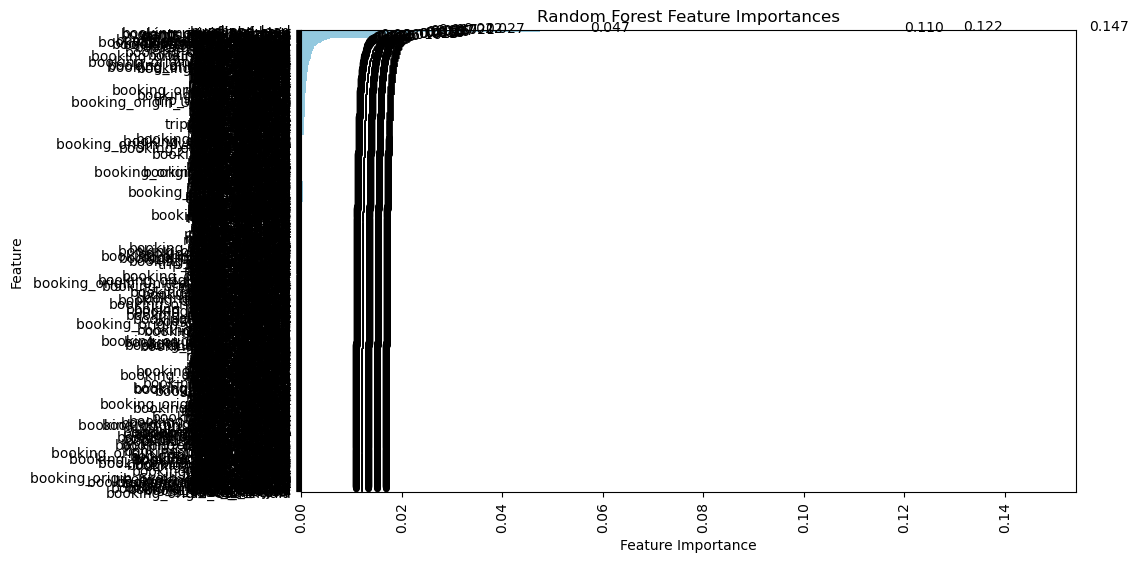

In [32]:
# Create a horizontal bar plot of feature importances
import matplotlib.pyplot as plt
import seaborn as sns
# Create a DataFrame to store feature importances
importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Create a bar plot with error bars for feature importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='importance', y='feature', data=feature_importances_df, color='skyblue')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Random Forest Feature Importances')

# Add error bars to the plot
for i, v in enumerate(feature_importances_df['importance']):
    ax.text(v + 0.01, i, f'{v:.3f}', color='black')  # Display feature importances with 3 decimal places

# Rotate y-axis labels for better readability
plt.xticks(rotation=90)

plt.show()